In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import glob
from reorder import reorder_coords

import numpy as np
from scipy.interpolate import splprep, splev, BSpline, spalde

from functions import *

In [2]:
data_dir = 'data/2D/'
files = glob.glob(data_dir+'*_slices.dat')
dataframes = []

for fname in files:
    df = read_2d_slice_data(fname)
    # Shift leading edge to (0,0)
    df['CoordinateX'] = df['CoordinateX'] - df['CoordinateX'].values[0]
    df['CoordinateY'] = df['CoordinateY'] - df['CoordinateY'].values[0]
    dataframes.append(df)

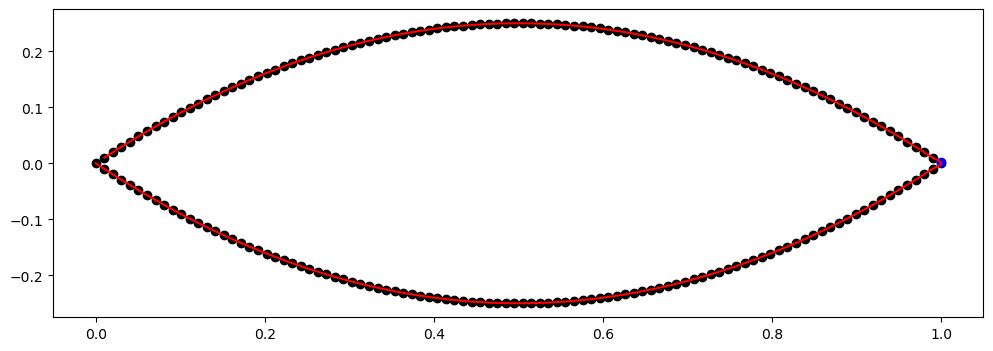

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,4))

# Create fictional airfoil surface
xb = np.linspace(0.0, 1.0, 100)
yb = -xb*(1-xb)
#yb = -np.sin(2*np.pi*xb)
#yb[xb>0.5] = 0.

xt = np.linspace(0., 1.0, 100)
yt = xt*(1-xt)

xt = xt[1:-1]
yt = yt[1:-1]

x = np.concatenate((xb,xt[::-1]))
y = np.concatenate((yb,yt[::-1]))
cp = np.ones(x.shape)

# Fit raw surface
#xspline, yspline, s, xtip, ytip, idx_tip = fit_raw_Bspline(x, y)

###
tck, u = splprep([x, y], s=0, k=3)

# Assumption: s=0.7 encompasses point of maximum curvature
u = np.linspace(0., 1.0, 1000)
new_points = splev(u, tck, der=0)
xspline, yspline = new_points[0], new_points[1]

d0, d1 = splev(u, tck, der=3)
idxs = np.argsort(np.abs(d1))[::-1]
imax = idxs[0]
xtip, ytip = xspline[imax], yspline[imax]


# Get coordinate index closest to B-spline tip
imin = closest_point(x, y, xtip, ytip)
xtip, ytip = x[imin], y[imin]
idx_tip = imin

ax.scatter(x, y, c='k')
ax.plot(xspline, yspline, c='r')

for i in range(1):
    xtip, ytip = xspline[idxs[i]], yspline[idxs[i]]
    ax.scatter(xtip, ytip, c='b')

0.0 0.0 1.0 0.0


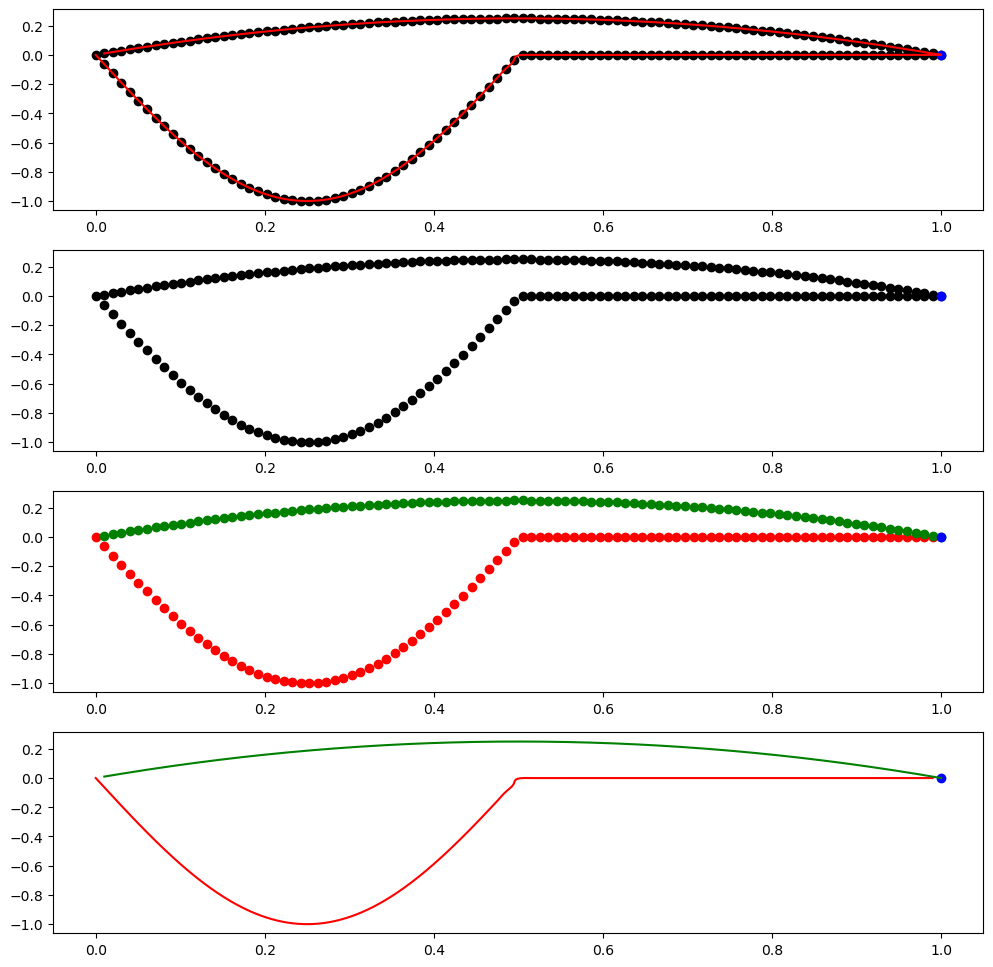

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(12,12))

# Create fictional airfoil surface
xb = np.linspace(0.0, 1.0, 100)
yb = -np.sin(2*np.pi*xb)
yb[xb>0.5] = 0.

xt = np.linspace(0., 1.0, 100)
yt = xt*(1-xt)

xt = xt[1:-1]
yt = yt[1:-1]

x = np.concatenate((xb,xt[::-1]))
y = np.concatenate((yb,yt[::-1]))
cp = np.ones(x.shape)

# Fit raw surface
xspline, yspline, s, xtip, ytip, idx_tip = fit_raw_Bspline(x, y)

axs[0].scatter(x, y, c='k')
axs[0].plot(xspline, yspline, c='r')
axs[0].scatter(xtip, ytip, c='b')

# Rotate and scale raw data
x, y, xtip, ytip = rotate_scale(x, y, xtip, ytip)

axs[1].scatter(x, y, c='k')
axs[1].scatter(xtip, ytip, c='b')
print(x[0], y[0], xtip, ytip)

# Separate data (geometric and fluid) intp top and bottom components
xyb, xyt, vb, vt, idx_tip = separate_top_bottom(x, y, cp, idx_tip)
xb, yb, xt, yt = xyb[:,0], xyb[:,1], xyt[:,0], xyt[:,1]

axs[2].scatter(xb, yb, c='r')
axs[2].scatter(xt, yt, c='g')
axs[2].scatter(xtip, ytip, c='b')

# Fit B-Spline to bottom/top processed coordinate data
ns = int(1e3)
xysb, vsb, sb = spline_field_fit(xyb, vb, ns)
xsb, ysb = xysb[:,0], xysb[:,1]


# Fit B-Spline to top processed coordinate/field data
xyst, vst, st = spline_field_fit(xyt, vt, ns)
xsb, ysb, xst, yst = xysb[:,0], xysb[:,1], xyst[:,0], xyst[:,1]

#axs[3].scatter(xb, yb, c='r')
#axs[3].scatter(xt, yt, c='g')
axs[3].plot(xsb, ysb, c='r')
axs[3].plot(xst, yst, c='g')
axs[3].scatter(xtip, ytip, c='b')

plt.show()

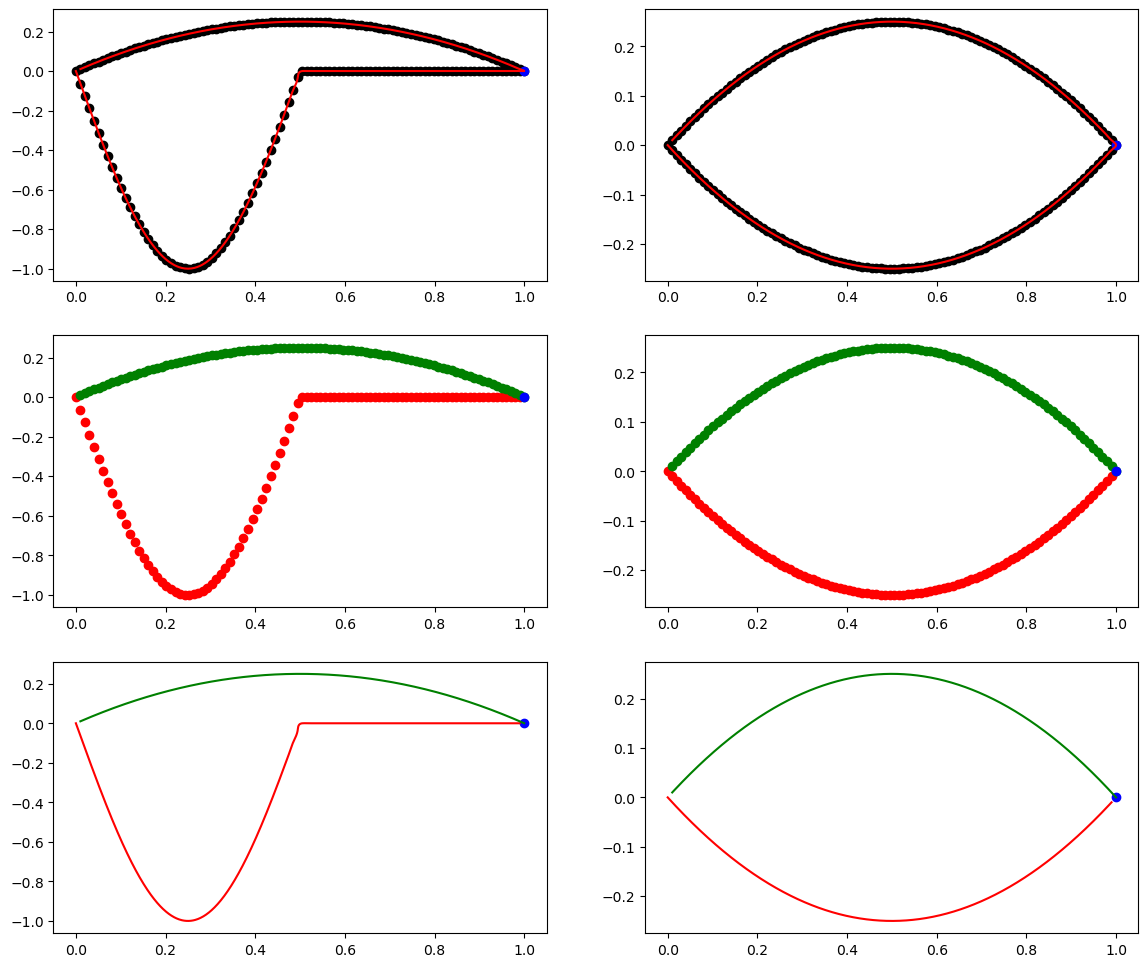

In [9]:
import sys
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(14,12))

# Create first fictional airfoil surface
xb = np.linspace(0.0, 1.0, 100)
yb = -np.sin(2*np.pi*xb)
yb[xb>0.5] = 0.

xt = np.linspace(0., 1.0, 100)
yt = xt*(1-xt)

xt = xt[1:-1]
yt = yt[1:-1]

x1 = np.concatenate((xb,xt[::-1]))
y1 = np.concatenate((yb,yt[::-1]))
cp1 = np.ones(x.shape)

# Create second fictional airfoil surface
xb = np.linspace(0.0, 1.0, 100)
yb = -xb*(1-xb)

xt = np.linspace(0., 1.0, 100)
yt = xt*(1-xt)

xt = xt[1:-1]
yt = yt[1:-1]

x2 = np.concatenate((xb,xt[::-1]))
y2 = np.concatenate((yb,yt[::-1]))
cp2 = np.ones(x.shape)

# Fit raw surface
xspline1, yspline1, s1, xtip1, ytip1, idx_tip1 = fit_raw_Bspline(x1, y1)
xspline2, yspline2, s2, xtip2, ytip2, idx_tip2 = fit_raw_Bspline(x2, y2)

axs[0,0].scatter(x1, y1, c='k')
axs[0,0].plot(xspline1, yspline1, c='r')
axs[0,0].scatter(xtip1, ytip1, c='b')
axs[0,1].scatter(x2, y2, c='k')
axs[0,1].plot(xspline2, yspline2, c='r')
axs[0,1].scatter(xtip2, ytip2, c='b')

# Rotate and scale raw data
x1, y1, xtip1, ytip1 = rotate_scale(x1, y1, xtip1, ytip1)
x2, y2, xtip2, ytip2 = rotate_scale(x2, y2, xtip2, ytip2)

# Separate data (geometric and fluid) intp top and bottom components
xyb1, xyt1, vb1, vt1, idx_tip1 = separate_top_bottom(x1, y1, cp1, idx_tip1)
xb1, yb1, xt1, yt1 = xyb1[:,0], xyb1[:,1], xyt1[:,0], xyt1[:,1]

xyb2, xyt2, vb2, vt2, idx_tip2 = separate_top_bottom(x2, y2, cp2, idx_tip2)
xb2, yb2, xt2, yt2 = xyb2[:,0], xyb2[:,1], xyt2[:,0], xyt2[:,1]

axs[1,0].scatter(xb1, yb1, c='r')
axs[1,0].scatter(xt1, yt1, c='g')
axs[1,0].scatter(xtip1, ytip1, c='b')
axs[1,1].scatter(xb2, yb2, c='r')
axs[1,1].scatter(xt2, yt2, c='g')
axs[1,1].scatter(xtip2, ytip2, c='b')

# Fit B-Spline to bottom/top processed coordinate data
ns = int(1e3)
xysb1, vsb1, sb1 = spline_field_fit(xyb1, vb1, ns)
xysb2, vsb2, sb2 = spline_field_fit(xyb2, vb2, ns)



# Fit B-Spline to top processed coordinate/field data
xyst1, vst1, st1 = spline_field_fit(xyt1, vt1, ns)
xyst2, vst2, st2 = spline_field_fit(xyt2, vt2, ns)

xsb1, ysb1, xst1, yst1 = xysb1[:,0], xysb1[:,1], xyst1[:,0], xyst1[:,1]
xsb2, ysb2, xst2, yst2 = xysb2[:,0], xysb2[:,1], xyst2[:,0], xyst2[:,1]

#axs[3].scatter(xb, yb, c='r')
#axs[3].scatter(xt, yt, c='g')
axs[2,0].plot(xsb1, ysb1, c='r')
axs[2,0].plot(xst1, yst1, c='g')
axs[2,0].scatter(xtip1, ytip1, c='b')
axs[2,1].plot(xsb2, ysb2, c='r')
axs[2,1].plot(xst2, yst2, c='g')
axs[2,1].scatter(xtip2, ytip2, c='b')

plt.show()

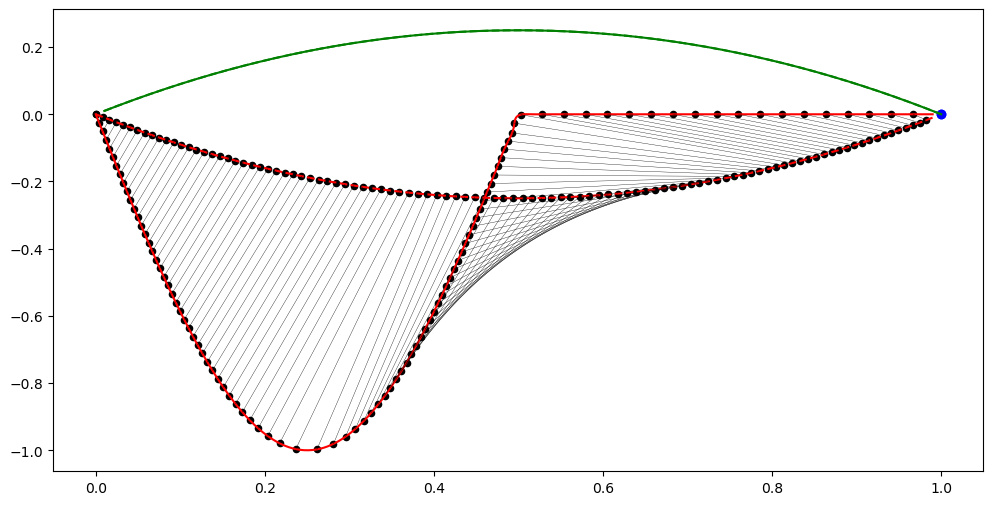

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(xsb1, ysb1, c='r')
ax.plot(xst1, yst1, c='g')
ax.scatter(xtip1, ytip1, c='b')
ax.plot(xsb2, ysb2, linestyle='--', c='r')
ax.plot(xst2, yst2, linestyle='--', c='g')
ax.scatter(xtip2, ytip2, c='b')

sb, st = sb1, st1

for i in range(0, len(sb), 10):
    ax.scatter(xsb1[i], ysb1[i], c='k', s=20)
    ax.scatter(xsb2[i], ysb2[i], c='k', s=20)
    ax.plot([xsb1[i], xsb2[i]], [ysb1[i], ysb2[i]], c='k', linewidth=0.25)

In [17]:
len(sb)

1000

(1998,) (1998,)
0.3561380723165217
1.0


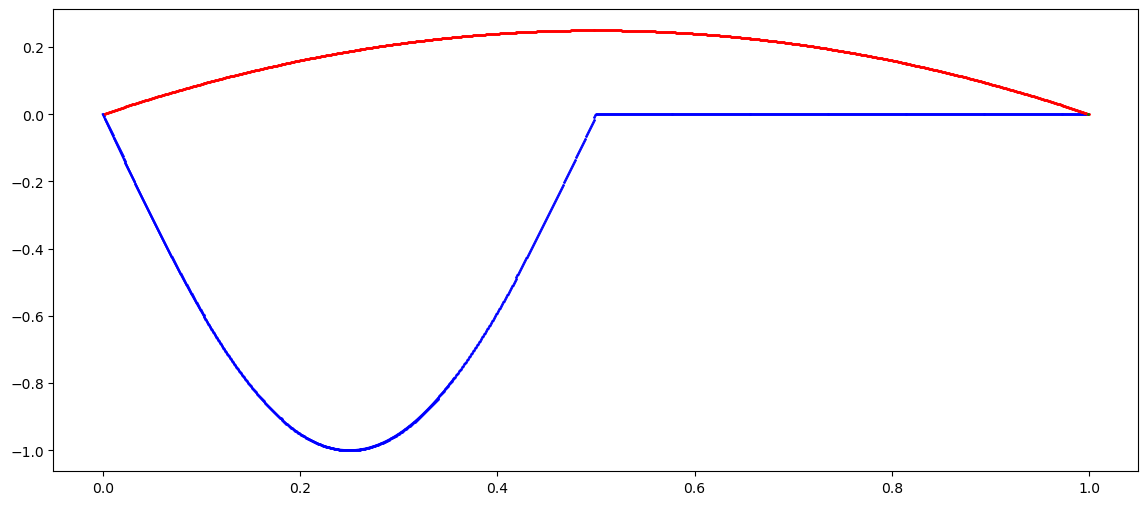

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
xb = np.linspace(0.0, 1.0, 1000)
yb = -np.sin(2*np.pi*xb)
yb[xb>0.5] = 0.

xt = np.linspace(0., 1.0, 1000)
yt = xt*(1-xt)

xt = xt[1:-1]
yt = yt[1:-1]

x = np.concatenate((xb,xt[::-1]))
y = np.concatenate((yb,yt[::-1]))
cp = np.ones(x.shape)

print(x.shape, y.shape)
xspline, yspline, s, xtip, ytip, idx_tip = fit_raw_Bspline(x, y)
    
# Rotate and scale raw data
x, y, xtip, ytip = rotate_scale(x, y, xtip, ytip)

# Separate data (geometric and fluid) intp top and bottom components
xyb, xyt, vb, vt, idx_tip = separate_top_bottom(x, y, cp, idx_tip)
xb, yb, xt, yt = xyb[:,0], xyb[:,1], xyt[:,0], xyt[:,1]


# Fit B-Spline to bottom processed coordinate/field data
ns = int(1e3)
xysb, vsb, sb = spline_field_fit(xyb, vb, ns)
xsb, ysb = xysb[:,0], xysb[:,1]


# Fit B-Spline to top processed coordinate/field data
xyst, vst, st = spline_field_fit(xyt, vt, ns)

# Decompose x/y coordinates
xsb, ysb, xst, yst = xysb[:,0], xysb[:,1], xyst[:,0], xyst[:,1]


# Geometry
ax.scatter(xb, yb, c='b', s=1)
ax.plot(xsb[sb<0.5], ysb[sb<0.5], c='b')
ax.scatter(xt, yt, c='r', s=1)
#axs.plot(xst, yst, c='r')
ax.scatter(xb[idx_tip], yb[idx_tip], c='g', s=1)

print(xsb[sb<0.5].max())
print(sb.max())

1.0066064882053696
1.0054102925342863
1.004937953802585
1.0039041227220316
1.0049508778041905
1.0039047541884243


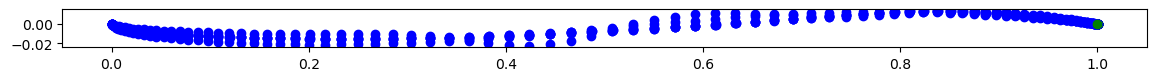

In [8]:
ns = 100
ndim = 2
nvar = 1
ndata = len(dataframes)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

geom_array = np.zeros((ndata, 2, ns, ndim))
field_array = np.zeros((ndata, 2, ns))

for i, df in enumerate(dataframes):
    # Fit raw spatial data to B-Splines
    x, y, cp = df['CoordinateX'].values, df['CoordinateY'].values, df['CP'].values
    
    xspline, yspline, s, xtip, ytip, idx_tip = fit_raw_Bspline(x,y)
    
    # Rotate and scale raw data
    x, y, xtip, ytip = rotate_scale(x, y, xtip, ytip)

    
    # Separate data (geometric and fluid) intp top and bottom components
    xyb, xyt, vb, vt, idx_tip = separate_top_bottom(x, y, cp, idx_tip)
    xb, yb, xt, yt = xyb[:,0], xyb[:,1], xyt[:,0], xyt[:,1]

    dx = xb[1:]-xb[:-1]
    dy = yb[1:]-yb[:-1]
    ds = np.sqrt(dx**2 + dy**2)
    l = np.concatenate(([0.], np.cumsum(ds)))
    
    
    '''
    # Fit B-Spline to bottom processed coordinate/field data
    xysb, vsb, sb = spline_geom_field_fit(xyb, vb, ns)
    
    # Fit B-Spline to top processed coordinate/field data
    xyst, vst, st = spline_geom_field_fit(xyt, vt, ns)

    # Decompose x/y coordinates
    xsb, ysb, xst, yst = xysb[:,0], xysb[:,1], xyst[:,0], xyst[:,1]

    # Store geometry and field data
    geom_array[i,0,:,:], geom_array[i,1,:,:] =  xysb, xyst
    field_array[i,0,:], field_array[i,1,:] = vsb, vst
    '''
    
    # Geometry
    ax.scatter(xb, yb, c='b')
    #ax.plot(xsb, ysb, c='b')
    #ax.scatter(xt, yt, c='r')
    #ax.plot(xst, yst, c='r')
    ax.scatter(xb[idx_tip], yb[idx_tip], c='g')

    print(l.max())
    if (i==5):
        break

ax.set_aspect('equal')

In [9]:
itarget = 0

distance_geometry = np.ones((ndata, ndata))*1e6
distance_field = np.ones((ndata, ndata))*1e6

for itarget in range(ndata):
    xytarget = geom_array[itarget,:,:,:]
    vtarget = field_array[itarget,:,:]
    
    for i in range(itarget+1,ndata):
        if i==itarget:
            distance_geometry[itarget, i] = 1e6
            distance_field[itarget, i] = 1e6
        else:
            xy = geom_array[i,:,:,:]
            v  = field_array[i,:,:]
    
            distance_geometry[itarget, i] = np.sum(np.sqrt(np.sum((xy - xytarget)**2, axis=1)))
            distance_field[itarget, i] = np.sum(np.sqrt(np.sum((v-vtarget)**2, axis=1)))

        if distance_geometry[itarget, i] < 5e-2:
            distance_geometry[itarget, i] = 1e6
            distance_field[itarget, i] = 1e6

print(distance_geometry.min())

1000000.0


In [10]:
matrix = distance_field
indices_1d = np.argpartition(matrix, 3, axis=None)[:3]
indices_2d_field = np.unravel_index(indices_1d, matrix.shape)
least_three_field = matrix[indices_2d_field]

print('least three values : ', least_three_field)
print('indices : ', *zip(*indices_2d_field) )

least three values :  [1000000. 1000000. 1000000.]
indices :  (48, 3) (48, 2) (48, 0)


In [11]:
matrix = distance_geometry
indices_1d = np.argpartition(matrix, 3, axis=None)[:3]
indices_2d_geometry = np.unravel_index(indices_1d, matrix.shape)
least_three_geometry = matrix[indices_2d_geometry]

print('least three values : ', least_three_geometry)
print('indices : ', *zip(*indices_2d_geometry) )

least three values :  [1000000. 1000000. 1000000.]
indices :  (48, 3) (48, 2) (48, 0)


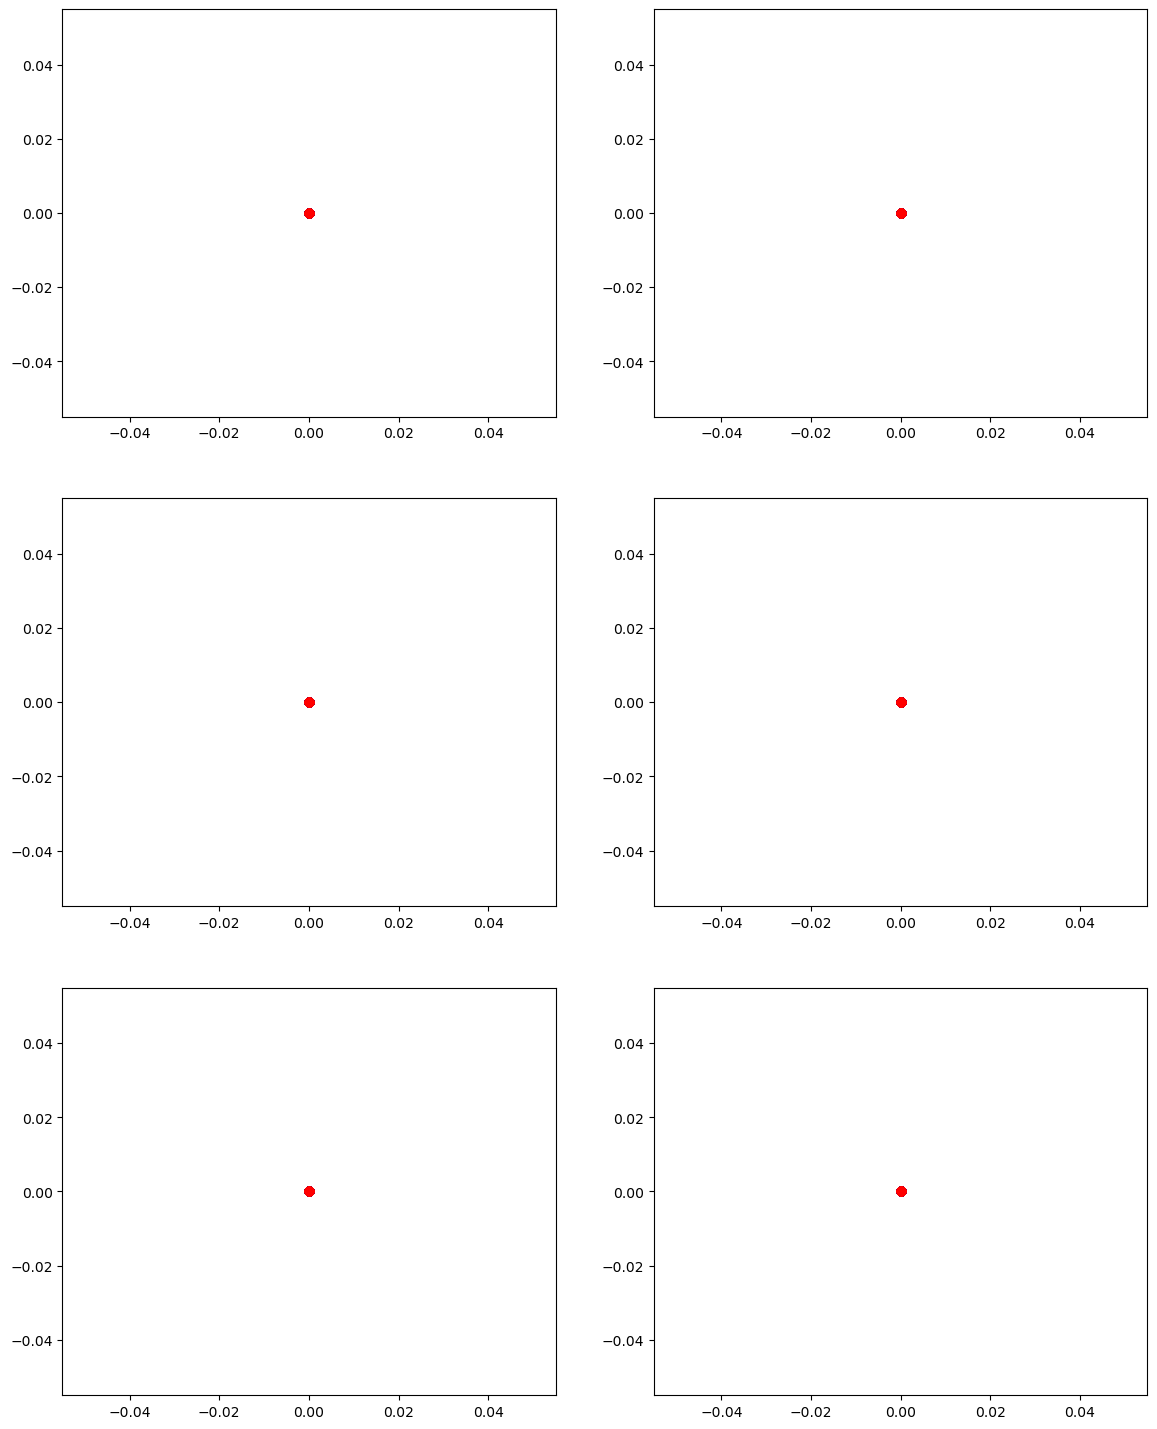

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,18))

for i in range(3):
    ix1, ix2 = indices_2d_geometry[0][i], indices_2d_geometry[1][i]
    iv1, iv2 = indices_2d_field[0][i], indices_2d_field[1][i]

    xytarget = geom_array[ix1,:,:,:]
    vtarget  = field_array[ix1,:,:]
    
    xy = geom_array[ix2,:,:,:]
    v  = field_array[ix2,:,:]

    axs[i,0].scatter(xytarget[0,:,0], xytarget[0,:,1], c='b')
    axs[i,0].plot(xy[0,:,0], xy[0,:,1], c='b')

    axs[i,0].scatter(xytarget[1,:,0], xytarget[1,:,1], c='r')
    axs[i,0].plot(xy[1,:,0], xy[1,:,1], c='r')

    axs[i,1].scatter(xytarget[0,:,0], vtarget[0,:], c='b')
    axs[i,1].plot(xy[0,:,0], v[0,:], c='b')

    axs[i,1].scatter(xytarget[1,:,0], vtarget[1,:], c='r')
    axs[i,1].plot(xy[1,:,0], v[1,:], c='r')

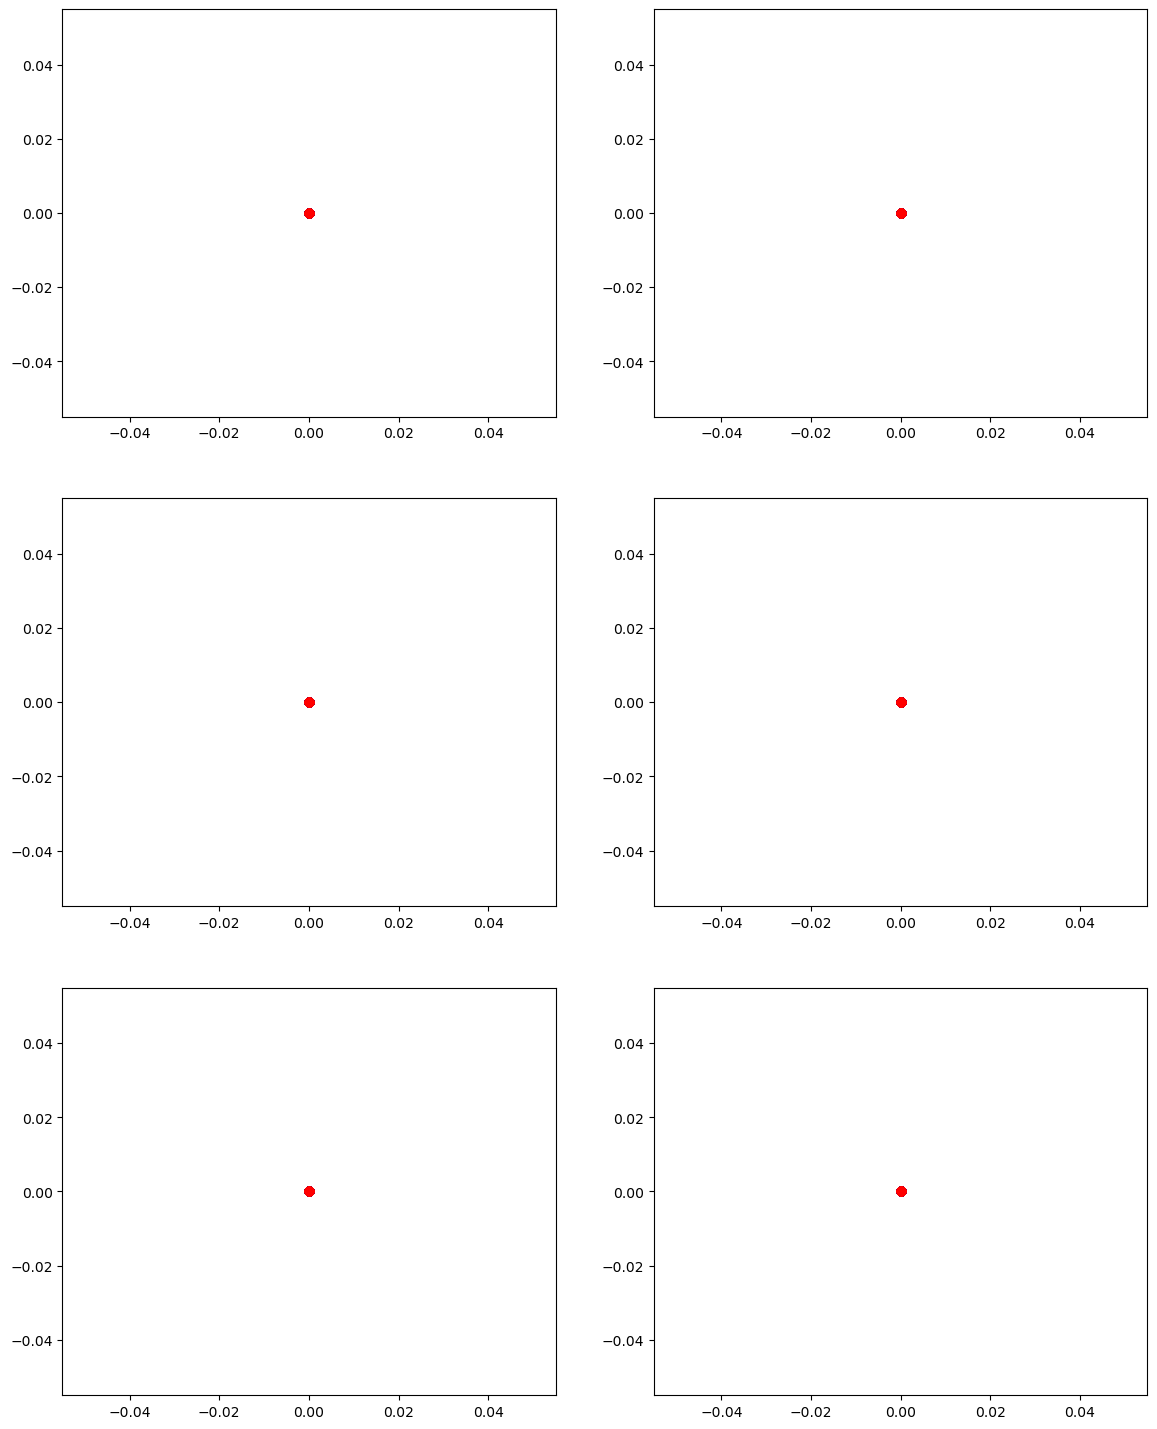

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,18))

for i in range(3):
    ix1, ix2 = indices_2d_geometry[0][i], indices_2d_geometry[1][i]
    iv1, iv2 = indices_2d_field[0][i], indices_2d_field[1][i]

    xytarget = geom_array[iv1,:,:,:]
    vtarget  = field_array[iv1,:,:]
    
    xy = geom_array[iv2,:,:,:]
    v  = field_array[iv2,:,:]

    axs[i,0].scatter(xytarget[0,:,0], xytarget[0,:,1], c='b')
    axs[i,0].plot(xy[0,:,0], xy[0,:,1], c='b')

    axs[i,0].scatter(xytarget[1,:,0], xytarget[1,:,1], c='r')
    axs[i,0].plot(xy[1,:,0], xy[1,:,1], c='r')

    axs[i,1].scatter(xytarget[0,:,0], vtarget[0,:], c='b')
    axs[i,1].plot(xy[0,:,0], v[0,:], c='b')

    axs[i,1].scatter(xytarget[1,:,0], vtarget[1,:], c='r')
    axs[i,1].plot(xy[1,:,0], v[1,:], c='r')